In [1]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 


In [2]:
##reading file
data = pd.read_csv("question1.csv")
# print(data)

In [3]:
## simple imputer for missing values
imp_data = SimpleImputer(missing_values=np.nan, strategy="median")
data["Income"]=imp_data.fit_transform(data[["Income"]])
data["Age"]=imp_data.fit_transform(data[["Age"]])
print (data)

   Region   Age   Income OnlineShopkeeper
0   India  49.0  86400.0               No
1  Brazil  32.0  57600.0              Yes
2     USA  35.0  64800.0               No
3  Brazil  43.0  73200.0               No
4     USA  45.0  73200.0              Yes
5   India  40.0  69600.0              Yes
6  Brazil  43.0  62400.0               No
7   India  53.0  94800.0              Yes
8     USA  55.0  99600.0               No
9   India  42.0  80400.0              Yes


<AxesSubplot:xlabel='Income', ylabel='Age'>

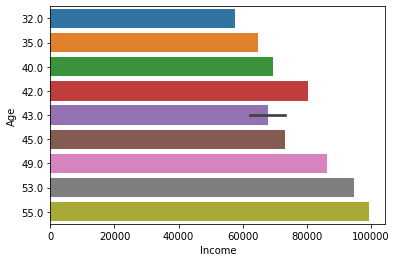

In [4]:
##barplot
sns.barplot(data=data,x="Income",y="Age",orient="h")

<AxesSubplot:>

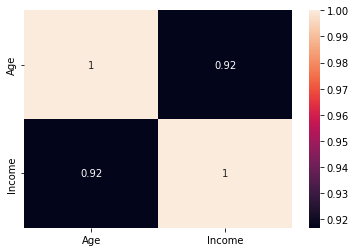

In [9]:
##heatmap of income
sns.heatmap(data.corr(),annot=True)

In [6]:
#handling categorical data of region using one hot encoder

encoded = OneHotEncoder().fit_transform(data[["Region"]]).toarray()
print(encoded)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [11]:
## separating test and train set
X = data.drop(columns="OnlineShopkeeper")
Y = data["OnlineShopkeeper"]

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.30)

In [8]:
## income and age features scaled

features = data.iloc[:,1:3].values

print ("Features before scaling")
print(features)

mms = MinMaxScaler(feature_range=(0,1))
features_scaled = mms.fit_transform(features)

print ("Features after scaling")
print(features_scaled)

Features before scaling
[[4.90e+01 8.64e+04]
 [3.20e+01 5.76e+04]
 [3.50e+01 6.48e+04]
 [4.30e+01 7.32e+04]
 [4.50e+01 7.32e+04]
 [4.00e+01 6.96e+04]
 [4.30e+01 6.24e+04]
 [5.30e+01 9.48e+04]
 [5.50e+01 9.96e+04]
 [4.20e+01 8.04e+04]]
Features after scaling
[[0.73913043 0.68571429]
 [0.         0.        ]
 [0.13043478 0.17142857]
 [0.47826087 0.37142857]
 [0.56521739 0.37142857]
 [0.34782609 0.28571429]
 [0.47826087 0.11428571]
 [0.91304348 0.88571429]
 [1.         1.        ]
 [0.43478261 0.54285714]]
